## Remarks and (proposed) Solutions to Exercises in Hansen Econometrics (2020) 

In [35]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.special
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (14, 8)
sns.set_style("whitegrid")

### Exercise 2.14

In [36]:
def normal_exp_gamma_density(x, mu, kappa, theta):
    a = np.exp((x - mu) ** 2 / (4 * theta ** 2))
    b, _ = sp.special.pbdv(-2 * kappa - 1, np.abs(x - mu) / theta)
    density = a * b
    return density

In [37]:
domain = np.linspace(-2, 2, num=100)
density = np.empty((100, 3))

for i, X in enumerate((4, 5, 6)):
    density[:, i] = normal_exp_gamma_density(
        domain, mu=0, kappa=X, theta=np.sqrt(X - 1)
    )

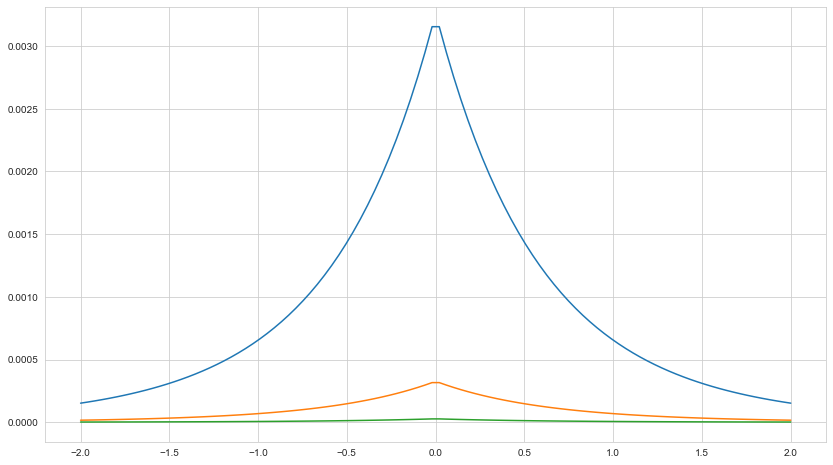

In [38]:
_ = plt.plot(domain, density)

### Exercise 9.17

In [66]:
q = 3
alpha = .95
n_minus_k = 1_000_000

In [67]:
chi2 = stats.chi2(df=q)
f = stats.f(dfn=q, dfd=n_minus_k)

In [68]:
domain = np.linspace(0, 10, num=100)

In [69]:
data = np.c_[chi2.pdf(domain), f.pdf(domain)]
df = pd.DataFrame(np.c_[domain, data], columns=["domain", "chi2", "f"])
df = df.melt(id_vars="domain", value_name="density", var_name="distr")

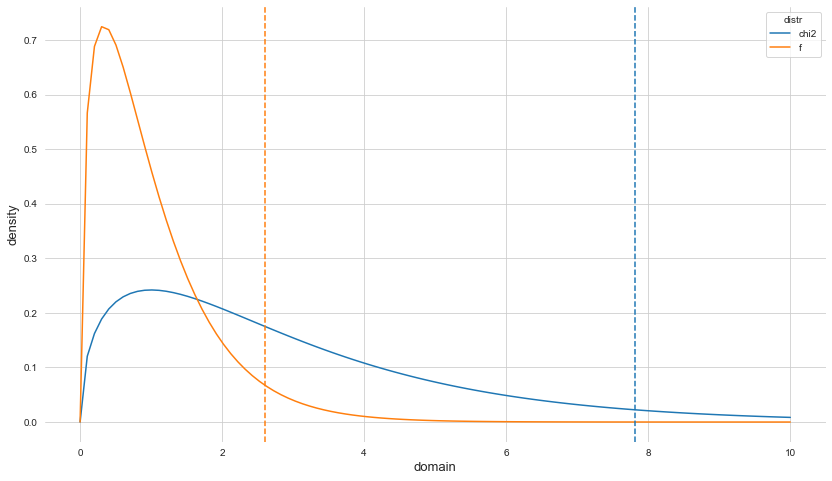

In [70]:
fig, ax = plt.subplots(1)

sns.lineplot(x="domain", y="density", hue="distr", ax=ax, data=df)

ax.axvline(chi2.ppf(alpha), ls="--", color="tab:blue")
ax.axvline(f.ppf(alpha), ls="--", color="tab:orange")

ax.set_frame_on(False)
ax.xaxis.label.set_size(13)
ax.yaxis.label.set_size(13)